# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.quickml.reader import read_csv
from scripts.quickml.plot import dataframe_distribution_overview, feature_filling, feature_distribution_univar, feature_trend_bivar, feature_distribution_bivar
from scripts.quickml.compare import index_lth
from scripts.utils import fill_infos

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

For performance reasons, i choose to write a function that allow me to "chunk" the dataset and only take a percentage. I use a method for taking randomly the rows in each chunk, the result is that the output dataset have the same shape than if it was the original one.

In [2]:
original_dataset = read_csv(pd, np, "./datas/en.openfoodfacts.org.products.csv", 5, delimiter="\t", chunk_size=10000, nrows=10000)

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
rows_nb, cols_nb = original_dataset.shape
original_dataset.shape

In [ ]:
original_dataset.head()

In [3]:
data = original_dataset.copy()

***
# 3 Cleaning

In [ ]:
dataframe_distribution_overview(data, figsize=(60, 2))

### Shape comparison with original dataset

Original dataset  
![dataset_100_percent](images/global_overview_100p.png)

In [ ]:
features = []

***
## 3.1 General informations group

### 3.1.1 Overview

In [5]:
general_infos_features = data.loc[:, "code":"quantity"].columns
general_infos_features

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity'],
      dtype='object')

In [6]:
general_infos = data.loc[:, general_infos_features]

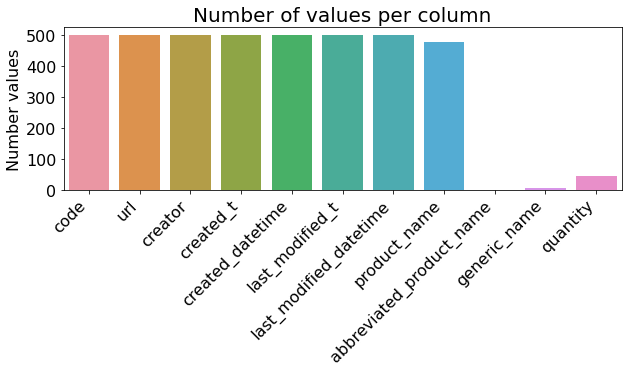

In [8]:
dataframe_distribution_overview(general_infos)

In [ ]:
general_infos.head()

In [9]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 9905 to 6871
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      500 non-null    object 
 1   url                       500 non-null    object 
 2   creator                   500 non-null    object 
 3   created_t                 500 non-null    int64  
 4   created_datetime          500 non-null    object 
 5   last_modified_t           500 non-null    int64  
 6   last_modified_datetime    500 non-null    object 
 7   product_name              477 non-null    object 
 8   abbreviated_product_name  0 non-null      float64
 9   generic_name              9 non-null      object 
 10  quantity                  45 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.9+ KB


***
### 3.1.2 Usability

#### 3.1.2.1 Usability: Quantity

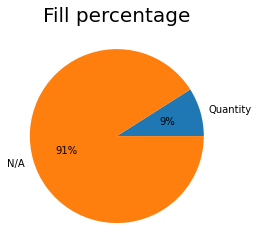

In [7]:
feature_filling(general_infos, "quantity", "Quantity")

In [ ]:
general_infos[general_infos.quantity.notna()].quantity.head(10)

The feature "quantity" is highly non homogeneous and will be very difficult to use. We will not keep it.

In [ ]:
general_infos.drop(columns=["quantity"], inplace=True)

#### 3.1.2.2 Usability: abbreviated_product_name

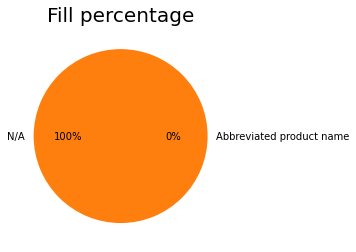

In [10]:
feature_filling(general_infos, "abbreviated_product_name", "Abbreviated product name")

In [ ]:
general_infos[general_infos["abbreviated_product_name"].notna()].loc[:, ["abbreviated_product_name"]].head()

The fill percentage of 'abbreviated_product_name" is very low, we can rid of it.

In [ ]:
general_infos.drop(columns=["abbreviated_product_name"], inplace=True)

***
### 3.1.3 Redundancy

#### 3.1.3.1 Redundancy: product_name, generic_name

In [ ]:
general_infos.loc[:, ["generic_name", "product_name"]].describe()

The features "abbreviated_product_name" and "

In [ ]:
general_infos.loc[:, ["generic_name", "product_name"]].iloc[:].head()

We can see that 'abbreviated_product_name' contains too fews entries to be usefull.  
Regarding the 'generic_name', the fill percentage is not very high, but worst, each time 'generic_name' is filled, so is 'product_name'.

In [ ]:
general_infos.drop(columns=["generic_name"], inplace=True)

***
### 3.1.4 Conclusion

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.1.4.1 Original

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.2 Tags group

### 3.2.1 Overview

In [ ]:
tags_features = data.loc[:, "packaging":"countries_en"].columns
tags_features

In [ ]:
tags = data.loc[:, tags_features]

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [ ]:
tags.head()

In [ ]:
tags.iloc[:, :13].info()

In [ ]:
tags.iloc[:, 13:].info()

***
### 3.2.2 Usability

#### 3.2.2.1 Usability: packaging_text

In [ ]:
tags.packaging_text.notna().sum()

In [ ]:
tags.drop(columns=["packaging_text"], inplace=True)

***
#### 3.2.2.2 Usability: cities

In [ ]:
tags.cities.notna().sum()

In [ ]:
tags.drop(columns=["cities"], inplace=True)

***
### 3.2.3 Redundancy

#### 3.2.3.1 Redundancy: packaging, packaging_tags

In [ ]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

In [ ]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

In [ ]:
tags.drop(columns=["packaging_tags"], inplace=True)

***
#### 3.2.3.2 Redundancy: brands, brands_tags

In [ ]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

In [ ]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

In [ ]:
tags.drop(columns=["brands_tags"], inplace=True)

***
#### 3.2.3.3 Redundancy: categories, categories_tags, categories_en

In [ ]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

In [ ]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

In [ ]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

We will keep "categories_en".

In [ ]:
tags.drop(columns=["categories", "categories_tags"], inplace=True)

***
#### 3.2.3.4 Redundancy: origins, origins_tags, origins_en

In [ ]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

In [ ]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

In [ ]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

We will keep the feature "origins"

In [ ]:
tags.drop(columns=["origins_tags", "origins_en"], inplace=True)

***
#### 3.2.3.5 Redundancy: manufacturing_places, manufacturing_places_tags

In [ ]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

We will keep the feature "manufacturing_places"

In [ ]:
tags.drop(columns=["manufacturing_places_tags"], inplace=True)

***
#### 3.2.3.6 labels, labels_tags, labels_en

In [ ]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

We will keep "labels_en"

In [ ]:
tags.drop(columns=["labels", "labels_tags"], inplace=True)

***
#### 3.2.3.7 emb_codes, emb_codes_tags

In [ ]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

We will keep "emb_codes".

In [ ]:
tags.drop(columns=["emb_codes_tags"], inplace=True)

***
#### 3.2.3.8 countries, countries_tags, countries_en

In [ ]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

In [ ]:
fill_infos(tags, "countries_en")

In [ ]:
tags.drop(columns=["countries", "countries_tags"], inplace=True)

***
### 3.2.4 Conclusion

In [ ]:
tags.describe()

In [ ]:
tags.info()

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.2.4.1 Original

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=data[tags_features].columns, y=data[tags_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.3 Ingredients group

### 3.3.1 Overview

In [ ]:
ingredients_features = data.loc[:, "ingredients_text":"traces_tags"].columns
ingredients_features

In [ ]:
ingredients = data.loc[:, ingredients_features]

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients_features, y=ingredients.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [ ]:
ingredients.info()

In [ ]:
ingredients.head()

***
### 3.3.2 Usability

#### 3.3.2.1 Usability: allergens_en

"allergens_en" is completely empty.

In [ ]:
ingredients.drop(columns=["allergens_en"], inplace=True)

***
### 3.3.3 Redundancy

#### 3.3.3.1 Redundancy: traces, traces_tags

In [ ]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

There is, at first sight, no better feature. We will keep "traces"

In [ ]:
ingredients.drop(columns=["traces_tags"], inplace=True)

***
### 3.3.4 Conclusion

In [ ]:
ingredients.describe()

In [ ]:
ingredients.info()

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients.columns, y=ingredients.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.3.4.1 Original

In [ ]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients_features, y=data[ingredients_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.4 Misc datas group

#### 3.4.1 Overview

In [ ]:
misc_features = data.loc[:,"serving_size":"image_nutrition_small_url"].columns
misc_features

In [ ]:
misc = data.loc[:, misc_features]

In [ ]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc_features, y=data[misc_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [ ]:
misc.iloc[:, :16].info()

In [ ]:
misc.iloc[:, 16:].info()

In [ ]:
misc.head(1)

***
### 3.4.2 Usability

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

In [ ]:
misc.drop(columns=["no_nutriments", "additives", "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags"], inplace=True)

***
### 3.4.3 Redundancy

#### 3.4.3.1 Redundancy: serving_siez, serving_quantity

In [ ]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

In [ ]:
misc.drop(columns=["serving_size"], inplace=True)

***
#### 3.4.3.2 Redundancy: additives_tags, additives_en

In [ ]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [ ]:
misc.drop(columns=["additives_tags"], inplace=True)

***
#### 3.4.3.3 Redundancy: nutriscore_score, nutriscore_grade

In [ ]:
misc.loc[:, ["nutriscore_score", "nutriscore_grade"]].loc[misc.nutriscore_score.notna() & misc.nutriscore_grade.notna()].iloc[:20]

We will keep both fields as one is quantitative and other is qualitative.

***
#### 3.4.3.4 Redundancy: pnns_groups_1, pnns_groups_2

In [ ]:
misc.loc[:, ["pnns_groups_1", "pnns_groups_2"]].loc[misc.pnns_groups_1.notna()].iloc[:20]

Both features don't contains same value, we will keep them.

***
#### 3.4.3.5 Redundancy: states, states_tags, states_en

In [ ]:
misc.loc[:, ["states", "states_tags", "states_en"]].iloc[:10]

Seems to be all useless. Let's see how many rows doesn't contains 'to-be-completed' or 'To be completed' in those features.

In [ ]:
misc.loc[~misc.states.str.contains("to-be-completed")].states.count()

In [ ]:
misc.loc[~misc.states_tags.str.contains("to-be-completed")].states_tags.count()

In [ ]:
misc.loc[~misc.states_en.str.contains("To be completed")].states_en.count()

These features contains no usefull informations, we will get rid of them.

In [ ]:
misc.drop(columns=["states", "states_tags", "states_en"], inplace=True)

***
#### 3.4.3.6 Redundancy: ecoscore_score_fr, ecoscore_grade_fr

In [ ]:
misc.loc[:, ["ecoscore_score_fr", "ecoscore_grade_fr"]].loc[misc.ecoscore_score_fr.notna() & misc.ecoscore_grade_fr.notna()].iloc[:20]

As the nutriscore, both ecoscore are usefull, we will keep both.

***
#### 3.4.3.7 Redundancy: main_category, main_category_en

In [ ]:
misc.loc[:, ["main_category", "main_category_en"]].iloc[:20]

We will keep "main_category_en"

In [ ]:
misc.drop(columns=["main_category"], inplace=True)

***
### 3.4.4 Conclusion

In [ ]:
misc.info()

In [ ]:
misc.describe()

In [ ]:
misc.loc[:, :"main_category_en"].describe(include=[object])

In [ ]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc.columns, y=misc.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.4.4.1 Original

In [ ]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc_features, y=data[misc_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.5 Nutrition facts group

### 3.5.1 Overview

In [ ]:
nutr_features = data.loc[:, "energy-kj_100g":"carnitine_100g"].columns
nutr_features

In [ ]:
nutr = data.loc[:, nutr_features]

In [ ]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr_features, y=nutr.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [ ]:
nutr.iloc[:, :10].info()

In [ ]:
nutr.iloc[:, 10:20].info()

In [ ]:
nutr.iloc[:, 20:30].info()

In [ ]:
nutr.iloc[:, 30:40].info()

In [ ]:
nutr.iloc[:, 40:50].info()

In [ ]:
nutr.iloc[:, 50:60].info()

In [ ]:
nutr.iloc[:, 60:70].info()

In [ ]:
nutr.iloc[:, 70:80].info()

In [ ]:
nutr.iloc[:, 80:90].info()

In [ ]:
nutr.iloc[:, 90:100].info()

In [ ]:
nutr.iloc[:, 100:110].info()

In [ ]:
nutr.iloc[:, 110:120].info()

***
### 3.5.2 Usability

All features that have less than 1% fill percentage will be dropped.

In [ ]:
index_lesser_than_percentage = quickml.index_lth(pd, np, nutr, 5)
index_lesser_than_percentage

In [ ]:
nutr.drop(columns=index_lesser_than_percentage, inplace=True)

***
### 3.5.3 Redundancy

#### 3.5.3.1 Redundancy: nutrition-score-fr_100g

nutrition-score-fr_100g is redundant with "nutriscore_score" and "nutriscore_grade". It will be dropped.

In [ ]:
nutr.drop(columns=["nutrition-score-fr_100g"], inplace=True)

***
#### 3.5.3.2 Redundancy: energy-kj_100g, energy-kcal_100g, energy_100g

In [ ]:
nutr.loc[:, ["energy-kj_100g", "energy-kcal_100g", "energy_100g"]].loc[nutr["energy-kj_100g"].notna()].iloc[:10]

The "energy-kj_100g" is much emptier than the two other energy features and bring no additional infos.
The feature "energy-kcal_100g" has explicit unit and is the most filled.

We will keep only "energy-kcal_100g"

In [ ]:
nutr.drop(columns=["energy-kj_100g", "energy_100g"], inplace=True)

***
### 3.5.4 Conclusion

In [ ]:
nutr.info()

In [ ]:
nutr.describe()

In [ ]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr.columns, y=nutr.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.5.4.1 Original

In [ ]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr_features, y=data[nutr_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.6 Results

In [ ]:
general_infos.head()

In [ ]:
misc.head()

_____________________________________________________________________ END TESTS _________________________________________________________________________________

In [ ]:
features = general_infos.join([tags, ingredients, misc, nutr])

In [ ]:
features.shape

In [ ]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=features.columns, y=features.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# 4 Saving

In [ ]:
features.shape

In [ ]:
features.to_csv("datas/sample.csv", sep=";")

***
# ? Nutriscore

## Nutriscore feature analysis

In [ ]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [ ]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

In [ ]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [ ]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.